# Pulling Products

In [0]:
import pickle
import json
from time import sleep
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path ='drive/My Drive/Colab Notebooks/meta_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r')

In [0]:
from time import sleep

count = 0

allproducts = {}

for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)

  aproduct = eval(aline)
  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
allcategories = {}
count = 0

for aproduct in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/len(allproducts))
  aproduct = allproducts[aproduct]
  if 'categories' in aproduct:
    for categories in aproduct['categories']:
      for acategory in categories:
        if acategory in allcategories:
          allcategories[acategory] += 1
        if acategory not in allcategories:
          allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
sortedlist = []

for acategory in allcategories:
  sortedlist.append((allcategories[acategory], acategory))

sorted(sortedlist, reverse = True)

[(3429257, 'Clothing, Shoes & Jewelry'),
 (1086181, 'Women'),
 (617092, 'Clothing'),
 (541681, 'Men'),
 (537761, 'Novelty, Costumes & More'),
 (432653, 'Shoes'),
 (339900, 'Novelty'),
 (268065, 'Shoes & Accessories: International Shipping Available'),
 (255454, 'Jewelry'),
 (174962, 'Accessories'),
 (97095, 'Girls'),
 (93596, 'Tops & Tees'),
 (87688, 'Dresses'),
 (84549, 'T-Shirts'),
 (82063, 'Boots'),
 (80302, 'Shirts'),
 (79897, 'Sandals'),
 (79545, 'Watches'),
 (77684, 'Boys'),
 (73507, 'Jewelry: International Shipping Available'),
 (72372, 'Athletic'),
 (71414, 'Wrist Watches'),
 (70335, 'Sports & Outdoors'),
 (59763, 'Petite'),
 (58350, 'Fashion'),
 (53826, 'Costumes & Accessories'),
 (53021, 'Earrings'),
 (51728, 'Baby'),
 (50943, 'Comfort Shoes'),
 (50662, 'Casual'),
 (50357, 'Boot Shop'),
 (50124, 'C'),
 (49599, 'Active'),
 (49491, 'Band & Music Fan'),
 (46004, 'New Arrivals'),
 (43722, 'Necklaces & Pendants'),
 (43410, 'Intimates'),
 (43100, 'S'),
 (41709, 'Lingerie, Sleep & L

In [0]:
alladidasasins = set()
count = 0

for areview in allproducts:
  theproduct = allproducts[areview]
  count += 1
  if count % 100000 == 0:
    print(count/len(allproducts))
  for categories in theproduct['categories']:
    for acategory in categories:
      if 'adidas' in acategory.lower():
        alladidasasins.add(theproduct['asin'])

print(len(alladidasasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
9457


In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/alladidasasins.txt', 'w')

outputfile.write(','.join(alladidasasins))
outputfile.close()


# Pulling Reviews

In [0]:
path ='drive/My Drive/Colab Notebooks/reviews_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r')

In [0]:
count = 0 
allreviews = {}
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)
  areview = eval(aline)
  allreviews[count] = areview

print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [0]:
from time import sleep


alladidasasins = []

for data in open('drive/My Drive/Colab Notebooks/alladidasasins.txt', 'r'):
  asins = data.split(',')
  for anasin in asins:
    alladidasasins.append(anasin)
print(alladidasasins)
len(alladidasasins)

['B000NIF6S0', 'B007PKCUJM', 'B002V2TU0Q', 'B0032U9132', 'B001OOLQYK', 'B0086VFKIW', 'B0012VRKS6', 'B0012VVYDI', 'B000J2P5NG', 'B00AW35OJ2', 'B000O3S794', 'B001I44CWY', 'B002QV351M', 'B0064OQ6JA', 'B002F006LQ', 'B002PDON4Y', 'B00083DGZ0', 'B000J551K0', 'B008I6TMUC', 'B00ASSF0NQ', 'B001CH7ALM', 'B00EPFCYLY', 'B0037Z6MDY', 'B00BJ9DDA0', 'B0037Z6AP4', 'B004B34FDK', 'B000W4FJ0U', 'B002E1ADJ6', 'B0021AFGT2', 'B0012XHNAY', 'B002PJ4WY4', 'B000QXV9AG', 'B0012QV0G4', 'B001OOM310', 'B0031QO6F0', 'B0056AC9B2', 'B002FQJ8DM', 'B003V4BOBQ', 'B003R4ZH8G', 'B00D3S44BM', 'B0026P3GIU', 'B005GC15IS', 'B000QXJOEY', 'B002L3RT7Q', 'B006QPMB46', 'B0012SF00O', 'B004FPI4YU', 'B0010ZJJHY', 'B001DTT1NO', 'B00213L06M', 'B007PBFMNW', 'B003DXA7QI', 'B00CZG1J3O', 'B0014XAR0K', 'B002DW9J6O', 'B00DP09DKK', 'B005IHDCCI', 'B0010NWPY0', 'B008I5LV70', 'B0014CP44A', 'B001CH1SBU', 'B00185V2BM', 'B002EZZXV0', 'B0012VM21G', 'B001BKM7DG', 'B006YQC6KG', 'B004ON5P0E', 'B002PMUYYS', 'B007U9I29A', 'B000O7WHLO', 'B001I44PV2', 'B000

9457

In [0]:
adidasreview = {}  
count = 0 
for areview in allreviews:
  count += 1
  if count %100000 ==0:
    print (count/5748920)

  thereview = allreviews[areview]


  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']
  if theasin in alladidasasins:

   
    thekey = '%s.%s' % (theasin,reviewerid)
    adidasreview[thekey] = thereview





0.017394571502125616
0.03478914300425123
0.05218371450637685
0.06957828600850247
0.08697285751062808
0.1043674290127537
0.12176200051487931
0.13915657201700493
0.15655114351913055
0.17394571502125616
0.19134028652338178
0.2087348580255074
0.226129429527633
0.24352400102975863
0.2609185725318843
0.27831314403400986
0.2957077155361355
0.3131022870382611
0.33049685854038674
0.34789143004251233
0.365286001544638
0.38268057304676356
0.4000751445488892
0.4174697160510148
0.43486428755314044
0.452258859055266
0.46965343055739167
0.48704800205951726
0.5044425735616429
0.5218371450637685
0.5392317165658941
0.5566262880680197
0.5740208595701454
0.591415431072271
0.6088100025743965
0.6262045740765222
0.6435991455786478
0.6609937170807735
0.678388288582899
0.6957828600850247
0.7131774315871503
0.730572003089276
0.7479665745914015
0.7653611460935271
0.7827557175956528
0.8001502890977784
0.8175448605999039
0.8349394321020296
0.8523340036041552
0.8697285751062809
0.8871231466084064
0.904517718110532


In [0]:
import json

json.dump(adidasreview,open('drive/My Drive/Colab Notebooks/alladidasreviews.json','w'))

alladidasreviews = json.load(open('drive/My Drive/Colab Notebooks/alladidasreviews.json','r'))

alladidasreviews

{'B000071JZK.A3SW93SXD720ER': {'asin': 'B000071JZK',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "A great shoe. Doesn't show off a lot. Really comfortable, and never out of style",
  'reviewTime': '01 8, 2005',
  'reviewerID': 'A3SW93SXD720ER',
  'reviewerName': 'Average Joe "John Hancock"',
  'summary': 'The Adidas Superstar I',
  'unixReviewTime': 1105142400},
 'B000071JZK.A29Y0F0ZEWAVZW': {'asin': 'B000071JZK',
  'helpful': [1, 1],
  'overall': 5.0,
  'reviewText': "I have 4 pairs of these shoes and I love them to death!  They are as close to indestructable as any shoe I've ever owned.  Then you're probably asking why I have so many.  Well, the answer is that this is the only shoe I know of that comes in so many colors (I've seen at least 7 or 8 colors) and works with just about everything in your wardrobe!  Jeans, khakis, whatever- they work, and I love 'em!!!",
  'reviewTime': '12 12, 2002',
  'reviewerID': 'A29Y0F0ZEWAVZW',
  'reviewerName': '"frankiepmcg"',
  'summary

# Preproccesing

In [0]:
!pip install tmtoolkit #installing in google colab

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 227kB/s 
     |████████████████████████████████| 1.5MB 38.5MB/s 
     |████████████████████████████████| 2.3MB 36.7MB/s 
     |████████████████████████████████| 112kB 45.7MB/s 
     |████████████████████████████████| 3.0MB 33.1MB/s 
     |████████████████████████████████| 22.1MB 1.2MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449906 sha256=b9f02cf65761df46d1bb58b53ae1be152d01eef2f7665730c592e65e80976108
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=837d85a2e3e5979f043d24fce3d0e21c78f6868655cb7fa682465279a426d115
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built nltk globre
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Foun

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import json
alladidasreviews = json.load(open('drive/My Drive/Colab Notebooks/alladidasreviews.json','r'))

reviewText= []
from tmtoolkit.corpus import Corpus
corpus = Corpus()

for _id, data in alladidasreviews.items():
  text = data['reviewText']
  reviewText.append(text)
for i, line in enumerate(reviewText):
  corpus.add_doc(str(i), line)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
print(len(corpus))
corpus.doc_labels
corpus['91']

27511


'My daughter kept borrowing the pair my husband has. She lives the textured surface on her feet. They fit perfectly.'

(array([2.6967e+04, 4.8900e+02, 3.9000e+01, 1.1000e+01, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  1024.1,  2048.2,  3072.3,  4096.4,  5120.5,  6144.6,
         7168.7,  8192.8,  9216.9, 10241. ]),
 <a list of 10 Patch objects>)

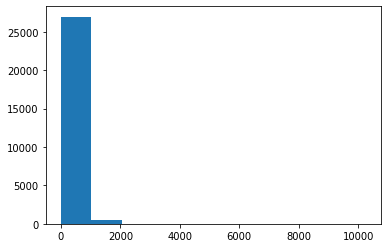

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values())

In [0]:
from tmtoolkit.preprocess import TMPreproc
preproc = TMPreproc (corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [27511 documents]>

In [0]:
corpus['91']

'My daughter kept borrowing the pair my husband has. She lives the textured surface on her feet. They fit perfectly.'

In [0]:
preproc.tokens['91']

['my',
 'daughter',
 'keep',
 'borrow',
 'the',
 'pair',
 'my',
 'husband',
 'have',
 '',
 'she',
 'live',
 'the',
 'textured',
 'surface',
 'on',
 'her',
 'foot',
 '',
 'they',
 'fit',
 'perfectly',
 '']

In [0]:
preproc.vocabulary_size

29204

In [0]:
preproc.stem()

<TMPreproc [27511 documents]>

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,0,0,a,DT
1,0,1,great,JJ
2,0,2,shoe,NN
3,0,3,,.
4,0,4,doe,VBZ
...,...,...,...,...
36,9999,36,but,CC
37,9999,37,yo,JJ
38,9999,38,ucan,JJ
39,9999,39,expect,NN


In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_uncommon_tokens(df_threshold= 0.01)
print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

25075
153


In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['my', 'daughter', 'keep', 'borrow', 'the', 'pair', 'my', 'husband', 'have', '', 'she', 'live', 'the', 'textur', 'surfac', 'on', 'her', 'foot', '', 'they', 'fit', 'perfect', '']
['daughter', 'pair', 'husband', 'foot']
['i', 'have', '4', 'pair', 'of', 'these', 'shoe', 'and', 'i', 'love', 'them', 'to', 'death', '', 'they', 'be', 'as', 'close', 'to', 'indestruct', 'as', 'ani', 'shoe', 'i', 've', 'ever', 'own', '', 'then', 'you', 're', 'probabl', 'ask', 'whi', 'i', 'have', 'so', 'mani', '', 'well', '', 'the', 'answer', 'be', 'that', 'this', 'be', 'the', 'onli', 'shoe', 'i', 'know', 'of', 'that', 'come', 'in', 'so', 'mani', 'color', '', 'i', 've', 'see', 'at', 'least', '7', 'or', '8', 'color', '', 'and', 'work', 'with', 'just', 'about', 'everyth', 'in', 'your', 'wardrob', '', 'jean', '', 'khaki', '', 'whatev', 'they', 'work', '', 'and', 'i', 'love', 'em', '', '', '']
['pair', 'shoe', 'shoe', 'shoe', 'color', 'color', 'everyth']
['i', 'love', 'these', 'sandal', '', 'veri', 'comfi', 'and', 's

In [0]:
import numpy as np

doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm

dtm_bg,dtm_sm

(<27511x25075 sparse matrix of type '<class 'numpy.int32'>'
 	with 1029451 stored elements in Compressed Sparse Row format>,
 <27511x153 sparse matrix of type '<class 'numpy.int32'>'
 	with 135641 stored elements in Compressed Sparse Row format>)

# Creating Models

In [0]:
!pip install tmtoolkit['lda']

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

#set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller':dtm_sm
}

#and fixed hyperparameters
lda_params = {
    'n_topics': 16,
    'eta': .001,
    'n_iter': 1000,
    'random_state': 20191122  #to make results reproducible
}

models = compute_models_parallel(dtms,constant_parameters = lda_params)
models

     |████████████████████████████████| 358kB 2.8MB/s 
     |████████████████████████████████| 102kB 6.8MB/s 


defaultdict(list,
            {'bigger': [({'eta': 0.001,
                'n_iter': 1000,
                'n_topics': 16,
                'random_state': 20191122},
               <lda.lda.LDA at 0x7f6feae4ac18>)],
             'smaller': [({'eta': 0.001,
                'n_iter': 1000,
                'n_topics': 16,
                'random_state': 20191122},
               <lda.lda.LDA at 0x7f6fea92e3c8>)]})

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_,vocab_sm,top_n=3)

topic_1
> #1. shoe (0.202958)
> #2. foot (0.120715)
> #3. sock (0.088731)
topic_2
> #1. bag (0.154452)
> #2. gym (0.066964)
> #3. pocket (0.066964)
topic_3
> #1. shoe (0.270094)
> #2. run (0.073544)
> #3. pair (0.051515)
topic_4
> #1. shoe (0.088720)
> #2. son (0.083057)
> #3. color (0.065124)
topic_5
> #1. pant (0.146288)
> #2. size (0.081574)
> #3. short (0.080261)
topic_6
> #1. product (0.152514)
> #2. watch (0.123657)
> #3. time (0.097300)
topic_7
> #1. son (0.179645)
> #2. soccer (0.141063)
> #3. cleat (0.125751)
topic_8
> #1. foot (0.125402)
> #2. sandal (0.122362)
> #3. pair (0.098327)
topic_9
> #1. shoe (0.120360)
> #2. amazon (0.088155)
> #3. boot (0.073254)
topic_10
> #1. shoe (0.275300)
> #2. color (0.118922)
> #3. great (0.047384)
topic_11
> #1. shoe (0.329537)
> #2. golf (0.105733)
> #3. foot (0.051084)
topic_12
> #1. shoe (0.313949)
> #2. pair (0.058652)
> #3. tenni (0.051726)
topic_13
> #1. pair (0.136280)
> #2. shoe (0.123020)
> #3. adida (0.116176)
topic_14
> #1. shirt

In [0]:
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_,vocab_bg,top_n=4)

topic_1
> #1.  (0.118396)
> #2. shoe (0.053692)
> #3. i (0.039237)
topic_2
> #1.  (0.121231)
> #2. i (0.069269)
> #3. they (0.042657)
topic_3
> #1.  (0.101854)
> #2. it (0.067026)
> #3. i (0.039975)
topic_4
> #1.  (0.096868)
> #2. the (0.038537)
> #3. i (0.036545)
topic_5
> #1.  (0.113048)
> #2. my (0.053231)
> #3. he (0.044165)
topic_6
> #1.  (0.184514)
> #2. y (0.029870)
> #3. de (0.023397)
topic_7
> #1.  (0.121449)
> #2. shoe (0.048827)
> #3. and (0.042159)
topic_8
> #1.  (0.102055)
> #2. size (0.054329)
> #3. a (0.052469)
topic_9
> #1.  (0.117441)
> #2. and (0.043320)
> #3. be (0.035722)
topic_10
> #1.  (0.151499)
> #2. be (0.055698)
> #3. it (0.048838)
topic_11
> #1.  (0.097806)
> #2. i (0.057303)
> #3. the (0.051537)
topic_12
> #1. the (0.074398)
> #2.  (0.070294)
> #3. be (0.035909)
topic_13
> #1.  (0.085021)
> #2. i (0.069347)
> #3. and (0.032115)
topic_14
> #1.  (0.111072)
> #2. it (0.049234)
> #3. the (0.040062)
topic_15
> #1.  (0.121881)
> #2. the (0.099530)
> #3. be (0.0455

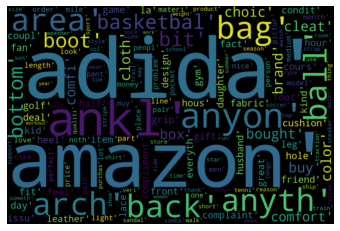

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1500, height = 1000).generate(str(vocab_sm))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
ks = list(range(1,302,20))
varying_params = [dict(n_topics = k, alpha = 1/k) for k in ks]
print(varying_params)

[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 61, 'alpha': 0.01639344262295082}, {'n_topics': 81, 'alpha': 0.012345679012345678}, {'n_topics': 101, 'alpha': 0.009900990099009901}, {'n_topics': 121, 'alpha': 0.008264462809917356}, {'n_topics': 141, 'alpha': 0.0070921985815602835}, {'n_topics': 161, 'alpha': 0.006211180124223602}, {'n_topics': 181, 'alpha': 0.0055248618784530384}, {'n_topics': 201, 'alpha': 0.004975124378109453}, {'n_topics': 221, 'alpha': 0.004524886877828055}, {'n_topics': 241, 'alpha': 0.004149377593360996}, {'n_topics': 261, 'alpha': 0.0038314176245210726}, {'n_topics': 281, 'alpha': 0.0035587188612099642}, {'n_topics': 301, 'alpha': 0.0033222591362126247}]


In [0]:
var_params = [{'n_topics': k, 'alpha': 1/k} for k in range(20, 121, 10)]
var_params

[{'alpha': 0.05, 'n_topics': 20},
 {'alpha': 0.03333333333333333, 'n_topics': 30},
 {'alpha': 0.025, 'n_topics': 40},
 {'alpha': 0.02, 'n_topics': 50},
 {'alpha': 0.016666666666666666, 'n_topics': 60},
 {'alpha': 0.014285714285714285, 'n_topics': 70},
 {'alpha': 0.0125, 'n_topics': 80},
 {'alpha': 0.011111111111111112, 'n_topics': 90},
 {'alpha': 0.01, 'n_topics': 100},
 {'alpha': 0.00909090909090909, 'n_topics': 110},
 {'alpha': 0.008333333333333333, 'n_topics': 120}]

In [0]:
from tmtoolkit.topicmod import tm_lda
from tmtoolkit.topicmod.tm_lda import evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter
const_params = {
    'n_iter': 100,
    'eta': 0.001,
    'random_state': 20191122
}
eval_results = evaluate_topic_models(dtm_sm,
                                     varying_parameters=var_params,
                                     constant_parameters=const_params,
                                     return_models=True)
eval_results[:3]

[({'alpha': 0.05,
   'eta': 0.001,
   'n_iter': 1000,
   'n_topics': 20,
   'random_state': 20191122},
  {'arun_2010': 411.9236012198896,
   'cao_juan_2009': 0.31391437213394,
   'coherence_mimno_2011': -2.9030192224960985,
   'model': <lda.lda.LDA at 0x7f6feadc5518>}),
 ({'alpha': 0.03333333333333333,
   'eta': 0.001,
   'n_iter': 1000,
   'n_topics': 30,
   'random_state': 20191122},
  {'arun_2010': 366.5071738029154,
   'cao_juan_2009': 0.29373293429721614,
   'coherence_mimno_2011': -2.9648068441344106,
   'model': <lda.lda.LDA at 0x7f6feadc5780>}),
 ({'alpha': 0.025,
   'eta': 0.001,
   'n_iter': 1000,
   'n_topics': 40,
   'random_state': 20191122},
  {'arun_2010': 317.58287767444165,
   'cao_juan_2009': 0.2775623003386642,
   'coherence_mimno_2011': -3.0374543231049964,
   'model': <lda.lda.LDA at 0x7f6feadc5710>})]

In [0]:
eval_results_by_topics = results_by_parameter(eval_results, 'n_topics')
eval_results_by_topics[:3]

[(20,
  {'arun_2010': 411.9236012198896,
   'cao_juan_2009': 0.31391437213394,
   'coherence_mimno_2011': -2.9030192224960985,
   'model': <lda.lda.LDA at 0x7f6feadc5518>}),
 (30,
  {'arun_2010': 366.5071738029154,
   'cao_juan_2009': 0.29373293429721614,
   'coherence_mimno_2011': -2.9648068441344106,
   'model': <lda.lda.LDA at 0x7f6feadc5780>}),
 (40,
  {'arun_2010': 317.58287767444165,
   'cao_juan_2009': 0.2775623003386642,
   'coherence_mimno_2011': -3.0374543231049964,
   'model': <lda.lda.LDA at 0x7f6feadc5710>})]

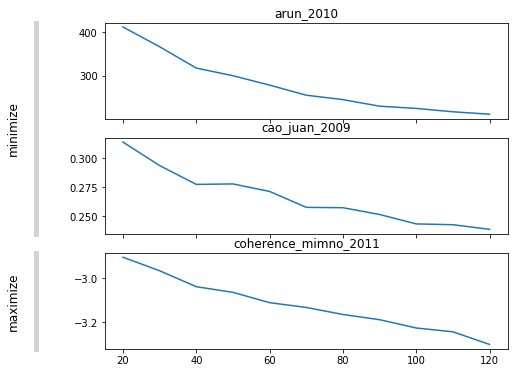

In [0]:
from tmtoolkit.topicmod.visualize import plot_eval_results
plot_eval_results(eval_results_by_topics);

In [0]:
from google.colab import drive
drive.mount('/content/drive')
topicfile = open('drive/My Drive/Colab Notebooks/Topicsforadidas.txt', 'w')
topicfile.write("The topics for Adidas: ")
topicfile.write('\n'.join(vocab_sm))
topicfile.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Topic Names and Classification

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_sm)
doc_topic = model_sm.doc_topic_
doc_labels = np.array(preproc_smaller.doc_labels)
topic_words = model_sm.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)

print(len(doc_topic))
print(len(doc_lengths_sm))

#remove "uncommon words" preprocessing

topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_ = .1
)

documentclassifications = ldamodel_top_doc_topics(doc_topic,doc_labels,top_n = 2,topic_labels=topic_labels)

for index, arow in documentclassifications.iterrows():
  documentclassifications.set_value(index, 'text',corpus[index])


27511
27511


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('soccer shoe')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
['Hi there, this shoe is really so "ultra light" as it was advertised. I\'m really happy to be surprised with its quality. It\'s very good for players on Forward position. Just one more thing you should know is that from normal soccer shoe (which weights 350grams) the Adizero (which weights 165 grams) is more sensitive when opponent kicks on your leg and you can get trauma more serious than with normal soccer shoe.', '7_cleat (0.4811)']


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
documentclassifications.to_excel('drive/My Drive/Colab Notebooks/topics.alladidasreviewsclassification.xlsx')

Mounted at /content/drive


In [0]:
import pandas as pd

df = pd.read_excel(r'drive/My Drive/Colab Notebooks/topics.alladidasreviewsclassification.xlsx')
df.head()

,document,rank_1,rank_2,text
0,0,10_compliment (0.2391),7_cleat (0.2391),A great shoe. Doesn't show off a lot. Really c...
1,1,10_compliment (0.593),13_samba (0.1279),I have 4 pairs of these shoes and I love them ...
2,10,13_samba (0.3405),11_golf (0.3405),I bought a pair of these shoes (in Espresso/Cr...
3,100,6_watch (0.5833),16_half (0.02778),The item that was order and expected was not w...
4,1000,16_half (0.4079),8_sandal (0.2763),These are good sandals. They feel good on your...


In [0]:
df.columns = ['document', 'rank_1','rank_2','text']
df['text']=df['text'].astype(str)
df.head()

,document,rank_1,rank_2,text
0,0,10_compliment (0.2391),7_cleat (0.2391),A great shoe. Doesn't show off a lot. Really c...
1,1,10_compliment (0.593),13_samba (0.1279),I have 4 pairs of these shoes and I love them ...
2,10,13_samba (0.3405),11_golf (0.3405),I bought a pair of these shoes (in Espresso/Cr...
3,100,6_watch (0.5833),16_half (0.02778),The item that was order and expected was not w...
4,1000,16_half (0.4079),8_sandal (0.2763),These are good sandals. They feel good on your...


In [0]:
rank_1 = pd.DataFrame(df['rank_1'].value_counts(sort=True))
rank_2 = pd.DataFrame(df['rank_2'].value_counts(sort=True))
rank_1.head()

,rank_1
16_half (0.0625),662
7_cleat (0.4231),253
16_half (0.3056),215
14_shirt (0.3056),204
4_love (0.4565),191


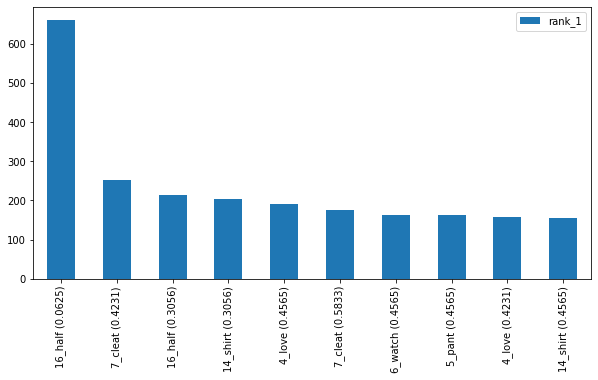

In [0]:
rank_1.head(10).plot.bar(figsize=(10,5))

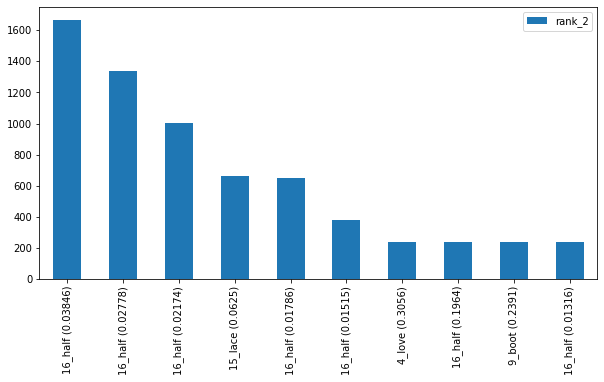

In [0]:
rank_2.head(10).plot.bar(figsize=(10,5))

# Sentiment Analysis

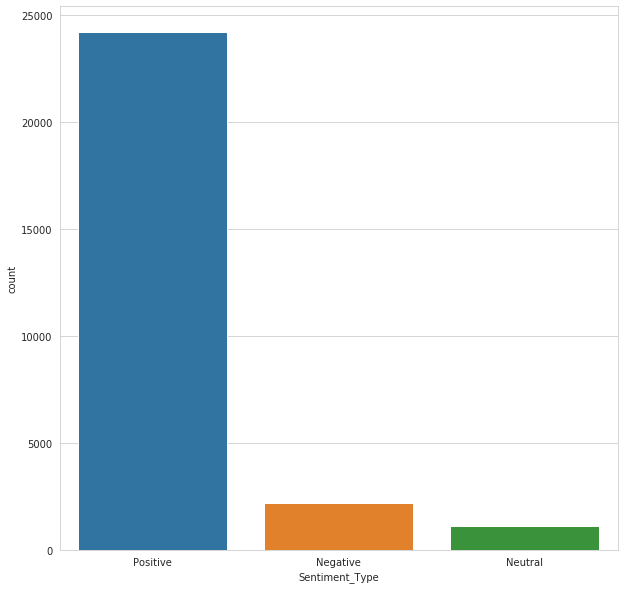

In [0]:
from textblob import TextBlob
import seaborn as sns
bloblist_desc = list()

df_str=df['text'].astype(str)
for row in df_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_desc):
    if df_desc['sentiment'] > 0:
        val = "Positive"
    elif df_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_desc['Sentiment_Type'] = df_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_desc)